<p><font size="6" color='grey'> <b>
Machine Learning
</b></font> </br></p>
<p><font size="5" color='grey'> <b>
Machine Learning & ChatGPT - Just Good Friends
</b></font> </br></p>

---

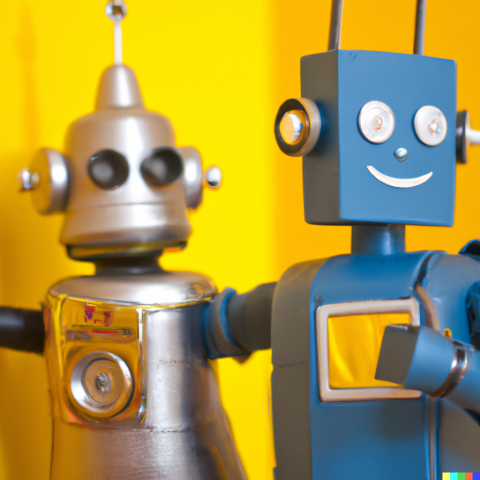

Bild mit DALL·E erstellt


# **1 <font color='orange'>|</font> Understand**
---



In [ ]:
#
# ---  Ersatz Upload der Daten in ChatGPT/ADA
#
import pandas as pd
filename = '/content/drive/MyDrive/ml-kurs/02 data/Auto-Mpg.csv'
data = pd.read_csv(filename, header=0)

In [ ]:
# Check for missing values in the data
missing_values = data.isnull().sum()

missing_values

In [ ]:
# Compute descriptive statistics for the numeric columns
descriptive_stats = data.describe()

descriptive_stats

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set_style("whitegrid")

# Prepare a list of columns to visualize
columns_to_visualize = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration']

# Create a figure and axis objects
fig, ax = plt.subplots(nrows=len(columns_to_visualize), figsize=(10, 12))

# Create boxplots for each column
for i, column in enumerate(columns_to_visualize):
    sns.boxplot(y=data[column], ax=ax[i])
    ax[i].set_title(f'Boxplot of {column}')
    ax[i].set_ylabel(column)

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Korrelationsmatrix der Merkmale')
plt.show()

# **2 <font color='orange'>|</font> Prepare**

---

In [ ]:
# 1. Remove the 'car name' column
data_cleaned = data.drop(columns='car name')

# 2. Investigate and handle the 'horsepower' column
# Check unique values in the 'horsepower' column to identify non-numeric values
unique_horsepower_values = data_cleaned['horsepower'].unique()

# Display non-numeric values in the 'horsepower' column
non_numeric_horsepower = [value for value in unique_horsepower_values if not value.isnumeric()]

# Handle non-numeric values: for simplicity, we'll replace them with NaN and then fill with the median
data_cleaned['horsepower'] = pd.to_numeric(data_cleaned['horsepower'], errors='coerce')
median_horsepower = data_cleaned['horsepower'].median()
data_cleaned['horsepower'].fillna(median_horsepower, inplace=True)

non_numeric_horsepower

# **3 <font color='orange'>|</font> Modeling**
---



In [ ]:
# 3. Split the data into training and test sets
from sklearn.model_selection import train_test_split

X = data_cleaned.drop(columns='mpg')
y = data_cleaned['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train the linear regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = linear_reg.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

rmse, r2

# **4 <font color='orange'>|</font> Evaluate**
---


In [ ]:
# Extract feature coefficients from the model
feature_coefficients = pd.Series(linear_reg.coef_, index=X.columns)

# Sort coefficients by absolute value for better visualization
sorted_coefficients = feature_coefficients.abs().sort_values(ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sorted_coefficients.plot(kind='barh', color='skyblue')
plt.title('Wichtigkeit der Merkmale (absoluter Wert der Koeffizienten)')
plt.xlabel('Absoluter Wert des Koeffizienten')
plt.ylabel('Merkmale')
plt.show()

feature_coefficients

In [ ]:
# Plot the distribution of 'mpg' based on 'origin'
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['origin'], y=data['mpg'])
plt.title('Verteilung von mpg nach origin')
plt.xlabel('Origin')
plt.ylabel('mpg')
plt.xticks(ticks=[0, 1, 2], labels=['Amerika', 'Europa', 'Asien'])
plt.show()

In [ ]:
# Plot the frequency distribution of 'origin'
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='origin')
plt.title('Häufigkeitsverteilung von origin')
plt.xlabel('Origin')
plt.ylabel('Anzahl der Fahrzeuge')
plt.xticks(ticks=[0, 1, 2], labels=['Amerika', 'Europa', 'Asien'])
plt.show()

# Compute the mean values of other features based on 'origin'
mean_values_by_origin = data.groupby('origin').mean()

mean_values_by_origin

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# Add a constant to the model (required for the VIF calculation in statsmodels)
X_with_const = sm.add_constant(X)

# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

vif_data

In [ ]:
# 1. Remove the 'displacement' feature
X_train_reduced = X_train.drop(columns='displacement')
X_test_reduced = X_test.drop(columns='displacement')

# 2. Train the linear regression model with the reduced features
linear_reg_reduced = LinearRegression()
linear_reg_reduced.fit(X_train_reduced, y_train)

# Predict on the test set
y_pred_reduced = linear_reg_reduced.predict(X_test_reduced)

# Calculate performance metrics
mse_reduced = mean_squared_error(y_test, y_pred_reduced)
rmse_reduced = mse_reduced ** 0.5
r2_reduced = r2_score(y_test, y_pred_reduced)

rmse_reduced, r2_reduced

In [ ]:
# Compute VIF for the reduced features
X_with_const_reduced = sm.add_constant(X_train_reduced)

# Compute VIF for each feature
vif_data_reduced = pd.DataFrame()
vif_data_reduced["Feature"] = X_with_const_reduced.columns
vif_data_reduced["VIF"] = [variance_inflation_factor(X_with_const_reduced.values, i) for i in range(X_with_const_reduced.shape[1])]

vif_data_reduced

In [ ]:
# Calculate residuals
residuals = y_test - y_pred_reduced

# Create plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# 1. Residuals vs. Predicted values
sns.scatterplot(x=y_pred_reduced, y=residuals, ax=axes[0, 0], alpha=0.6)
axes[0, 0].axhline(y=0, color='r', linestyle='--')
axes[0, 0].set_title('Residuen gegen vorhergesagte Werte')
axes[0, 0].set_xlabel('Vorhergesagte Werte')
axes[0, 0].set_ylabel('Residuen')

# 2. Histogram of residuals
sns.histplot(residuals, ax=axes[0, 1], bins=30, kde=True)
axes[0, 1].set_title('Histogramm der Residuen')
axes[0, 1].set_xlabel('Residuen')
axes[0, 1].set_ylabel('Häufigkeit')

# 3. Q-Q Plot
sm.qqplot(residuals, fit=True, line='45', ax=axes[1, 0])
axes[1, 0].set_title('Q-Q Plot der Residuen')

axes[1, 1].axis('off')  # Turn off the unused subplot

plt.tight_layout()
plt.show()

# **5 <font color='orange'>|</font> Deploy**
---